In [4]:
import numpy as np 
import matplotlib.pyplot as plt

import pickle

sys.path.append("../../domino/.")
from data.gaze_utils import make_heatmaps, max_visit, total_time, unique_visits, diffusivity, apply_lf
from functools import partial

E.g. gaze id in gaze_data dict:
1.2.276.0.7230010.3.1.2.8323329.1760.1517875169.291188/1.2.276.0.7230010.3.1.3.8323329.1760.1517875169.291187/1.2.276.0.7230010.3.1.4.8323329.1760.1517875169.291189.dcm


E.g. gaze sequence:
[(0.4270922758384065, 0.3409283084941497, 2), (0.3189582638650912, 0.7032448773383325, 1), (0.3457460360756106, 0.704534781856421, 1), (0.3132964708943114, 0.6926234455912129, 1), (0.15461549800435415, 0.7657952374393019, 1), (0.20816811965531995, 0.6211500035276568, 1), (0.19223406034560958, 0.6219114244566288, 1), (0.21525880174876588, 0.625762869788027, 5), (0.221534784971118, 0.6706627669260333, 1), (0.388223000791483, 0.7804617506808937, 1), (0.5512766670558288, 0.897317412962067, 2), (0.732321798735419, 0.9349425327904102, 1), (0.6453567899414745, 0.9609333844003655, 1), (0.6693195275963554, 0.9569348133813542, 1), (0.6860698168782141, 0.8622908603451056, 1), (0.6914377696837651, 0.670840164668781, 1), (0.33528426317187865, 0.6105700427462416, 1), (0.2510474139

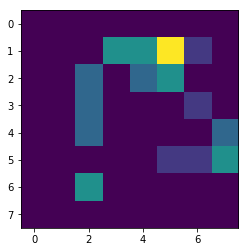

In [5]:
gaze_data = pickle.load(open("../../domino/data/cxr_gaze/cxr_gaze_data.pkl","rb"))

ndx = 0
gaze_id = list(gaze_data.keys())[ndx]

## Extracting gaze heatmap
print(f"E.g. gaze id in gaze_data dict:\n{gaze_id}\n\n")
gaze_seq = gaze_data[gaze_id]
print(f"E.g. gaze sequence:\n{gaze_seq}\n\n")

gaze_heatmap = make_heatmaps([gaze_seq]).squeeze()
print("E.g. gaze heatmap:")

plt.imshow(gaze_heatmap)
plt.show()


In [9]:
## Extracting gaze features

s1 = 3
s2 = 3
stride = 2
view_pct = 0.1

time_all = apply_lf([gaze_heatmap], total_time)
max_visit_all = apply_lf([gaze_heatmap], partial(max_visit, pct=view_pct))
unique_all = apply_lf([gaze_heatmap], unique_visits)

print(f"Time feature: {time_all}")
print(f"Max visit feature: {max_visit_all}")
print(f"Unique feature: {unique_all}")


Time feature: [ 35.]
Max visit feature: [ 6.]
Unique feature: [15]
